In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [5]:
dataset=load_breast_cancer()
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['output']=dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
params={
    'C':[1,5,10,10],
    'max_iter':[5]
}
model=LogisticRegression()
grid=GridSearchCV(model,param_grid=params,scoring='f1',cv=5)
grid.fit(X_train,Y_train)
print(grid.best_estimator_)
Y_pred=grid.predict(X_test)
print(Y_test[:5])
print(Y_pred[:5])
print('Accuracy score: ',accuracy_score(Y_test,Y_pred))
print('Confusion matrix: ',confusion_matrix(Y_test,Y_pred))
print('Classification report: ',classification_report(Y_test,Y_pred))





/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(C=1, max_iter=5)
512    0
457    1
439    1
298    1
37     1
Name: output, dtype: int64
[0 1 1 1 1]
Accuracy score:  0.8157894736842105
Confusion matrix:  [[26 21]
 [ 0 67]]
Classification report:                precision    recall  f1-score   support

           0       1.00      0.55      0.71        47
           1       0.76      1.00      0.86        67

    accuracy                           0.82       114
   macro avg       0.88      0.78      0.79       114
weighted avg       0.86      0.82      0.80       114



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

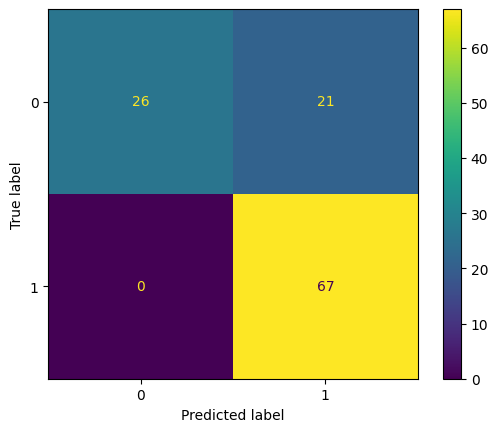

Accuracy score:  0.8157894736842105


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('Accuracy score: ',accuracy_score(Y_test,Y_pred)) #comaparitively less accuracy among all the algorithms

512    0
457    1
439    1
298    1
37     1
Name: output, dtype: int64
[0 1 1 1 1]
Accuracy score:  1.0


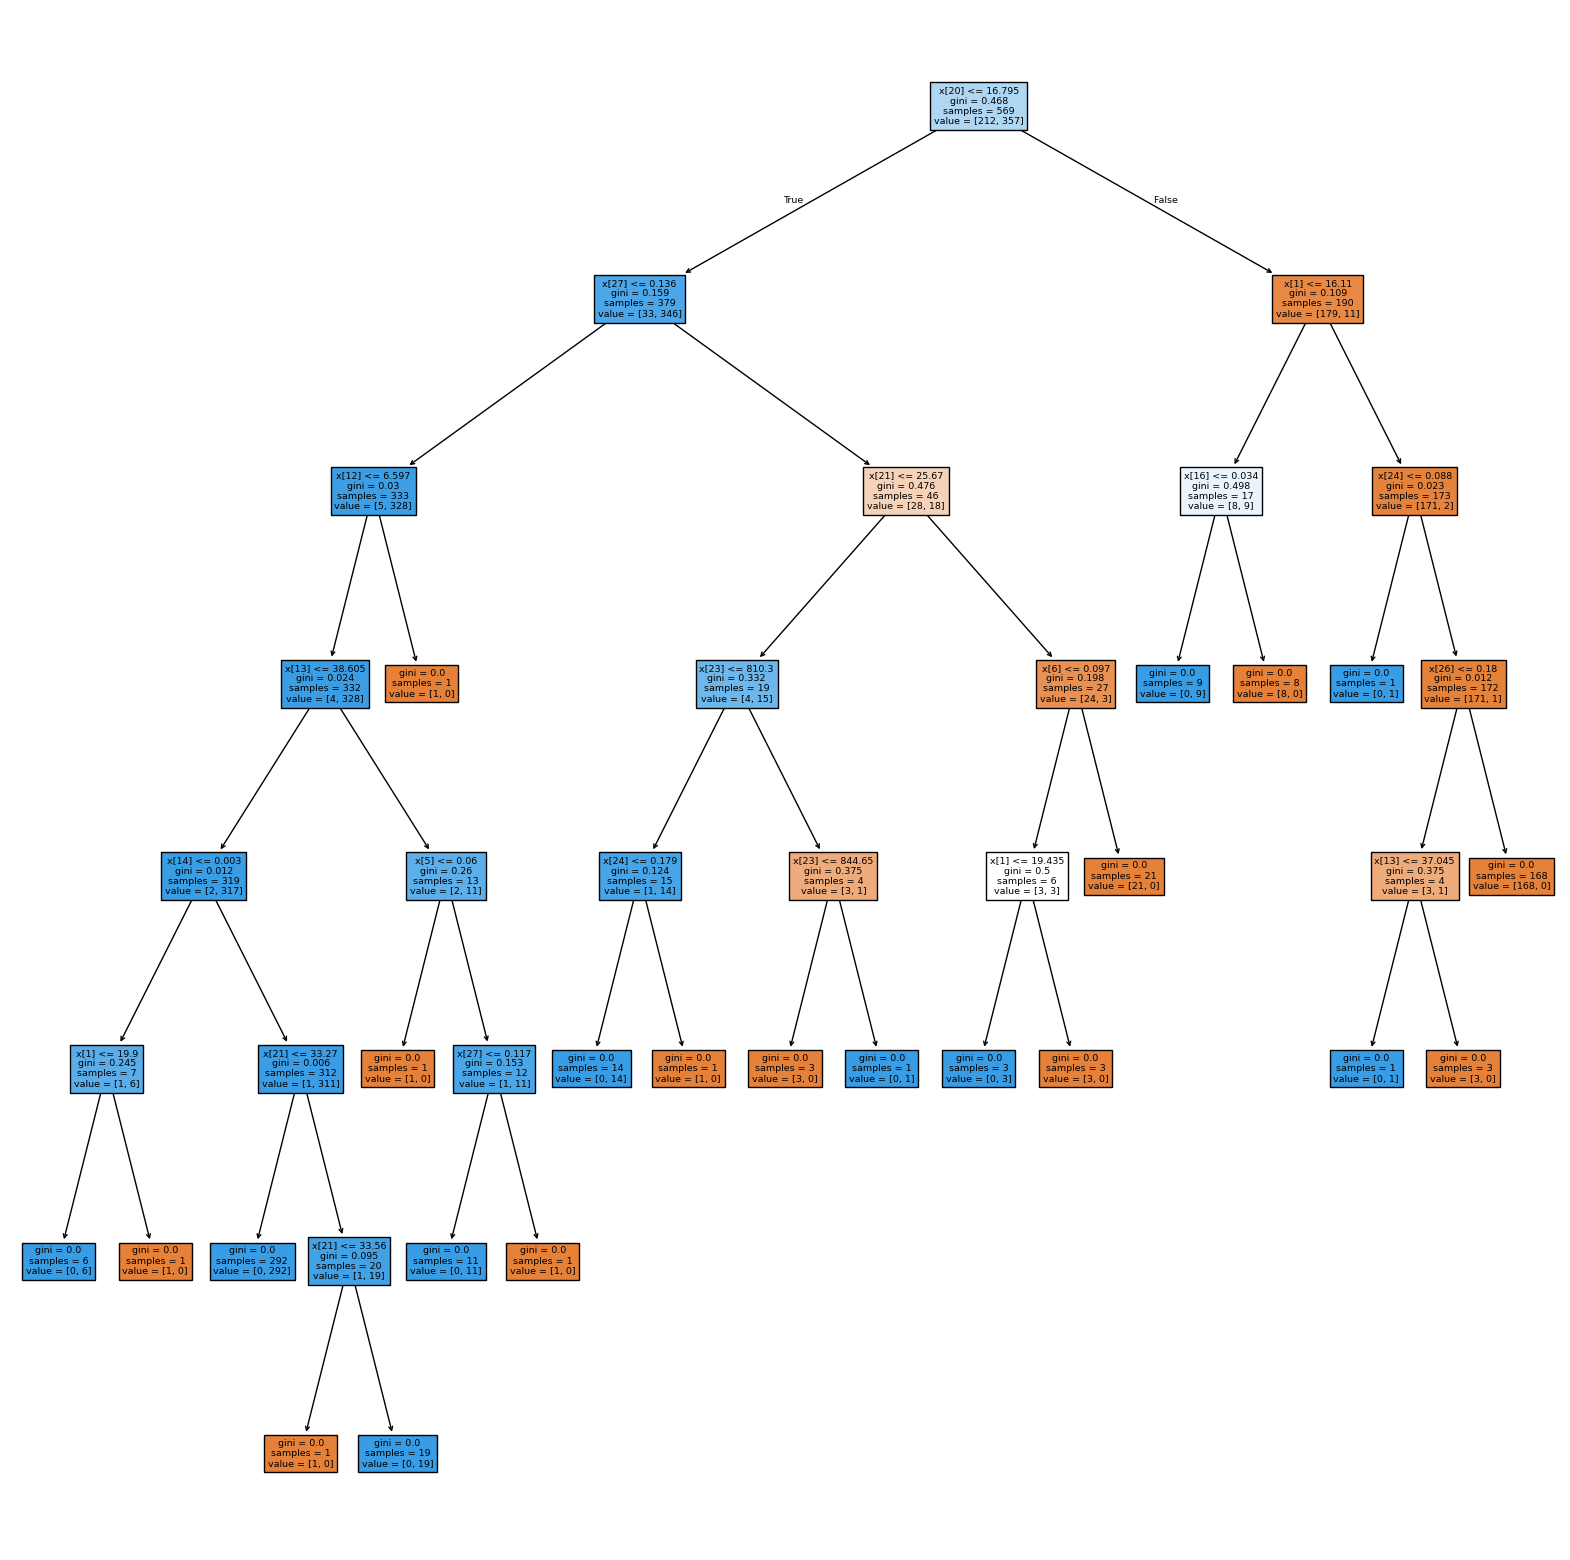

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier=DecisionTreeClassifier()#can add max_depth here and check --> max_depth=3
classifier.fit(X,Y)
y_pred=classifier.predict(X_test)
print(Y_test[:5])
print(y_pred[:5])
plt.figure(figsize=(20,20))
tree.plot_tree(classifier,filled=True)
print('Accuracy score: ',accuracy_score(Y_test,y_pred)) #100 percent accuracy but it is time consuming

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,  # number of trees
    random_state=0
)
bag_model.fit(X_train, Y_train)
y_pred_bag = bag_model.predict(X_test)
print(Y_test[:5])
print(y_pred_bag[:5])
print("Bagging Accuracy:", accuracy_score(Y_test, y_pred_bag)) # one of the best accuracy is obtained in bagging

512    0
457    1
439    1
298    1
37     1
Name: output, dtype: int64
[0 1 1 1 1]
Bagging Accuracy: 0.9385964912280702


In [22]:
from sklearn.ensemble import AdaBoostClassifier
boost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=0
)
boost_model.fit(X_train, Y_train)
y_pred_boost = boost_model.predict(X_test)
print("Boosting Accuracy:", accuracy_score(Y_test, y_pred_boost)) #one of the best accuracy is obtained in boosting

Boosting Accuracy: 0.9736842105263158


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, Y_train)
y_pred_xgb = model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, y_pred_xgb)) #One of the best accuracy is obtained in XGBoost

XGBoost Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:42:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm)) #One of the best accuracy is obtained in SVM

SVM Accuracy: 0.9298245614035088
